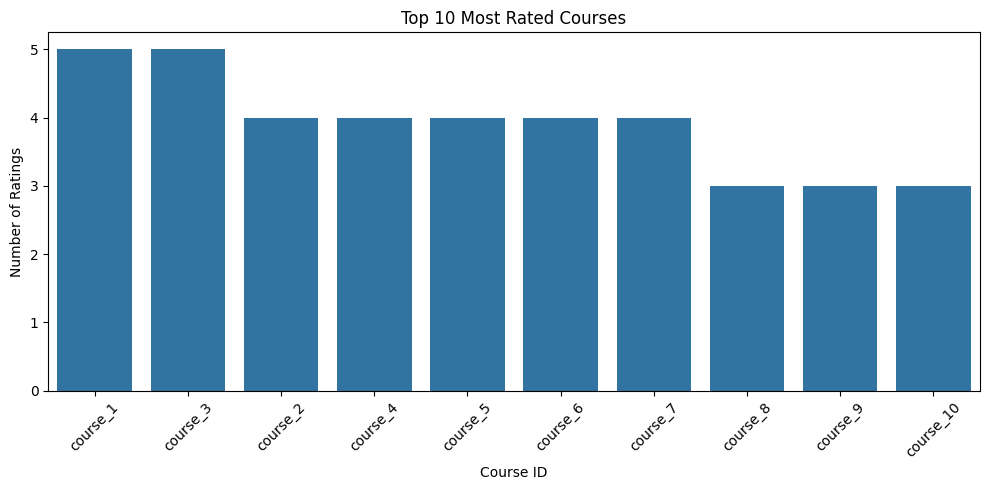

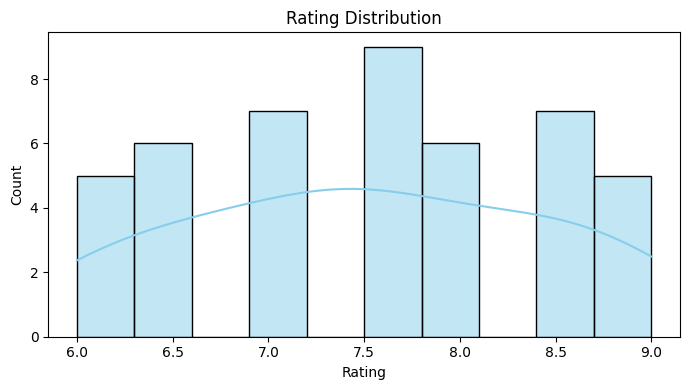


Collaborative Filtering Recommendations for intern_5:
Power BI for Visualization (Predicted Rating: 4.47)
Web Development with HTML & CSS (Predicted Rating: 3.46)
SQL for Data Management (Predicted Rating: 0.83)
Agile Software Development (Predicted Rating: 0.56)
Introduction to Python (Predicted Rating: 0.48)


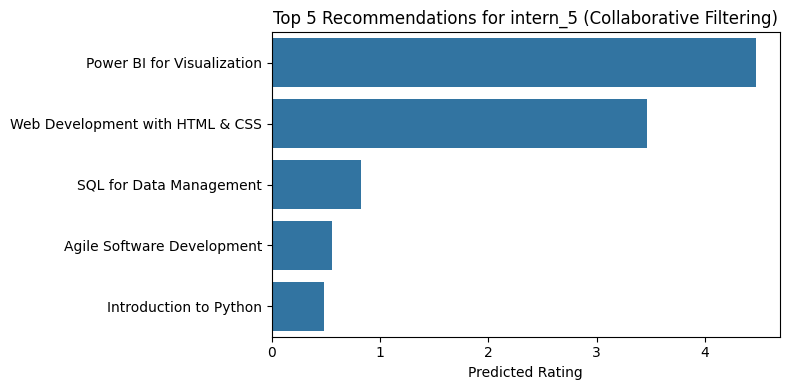


Content-Based:
1. Machine Learning Basics (AI)
   Difficulty: Intermediate, Duration: 21h
   Similarity Score: 0.33

2. Introduction to Python (Programming)
   Difficulty: Beginner, Duration: 27h
   Similarity Score: 0.17

3. Power BI for Visualization (Business Intelligence)
   Difficulty: Intermediate, Duration: 18h
   Similarity Score: 0.17

4. Cloud Computing Essentials (Cloud)
   Difficulty: Intermediate, Duration: 29h
   Similarity Score: 0.17

5. Cybersecurity Fundamentals (Security)
   Difficulty: Intermediate, Duration: 16h
   Similarity Score: 0.17

Recommendations for INTERN_5 (INT_5):
Department: AI, Skill: Advanced



In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

intern_data = pd.DataFrame([
    ['intern_1', 'course_1', 8.5], ['intern_1', 'course_2', 7.0], ['intern_1', 'course_3', 9.0],
    ['intern_2', 'course_2', 6.5], ['intern_2', 'course_4', 8.0], ['intern_2', 'course_5', 7.5],
    ['intern_3', 'course_1', 7.0], ['intern_3', 'course_4', 8.5], ['intern_3', 'course_5', 9.0],
    ['intern_4', 'course_3', 6.0], ['intern_4', 'course_4', 7.5], ['intern_4', 'course_6', 8.0],
    ['intern_5', 'course_2', 7.5], ['intern_5', 'course_6', 8.5], ['intern_5', 'course_7', 6.5],
    ['intern_6', 'course_1', 7.0], ['intern_6', 'course_7', 9.0], ['intern_6', 'course_8', 6.0],
    ['intern_7', 'course_8', 8.5], ['intern_7', 'course_3', 7.0], ['intern_7', 'course_9', 7.5],
    ['intern_8', 'course_10', 6.5], ['intern_8', 'course_11', 8.0], ['intern_8', 'course_1', 7.5],
    ['intern_9', 'course_12', 7.0], ['intern_9', 'course_3', 6.5], ['intern_9', 'course_5', 8.5],
    ['intern_10', 'course_6', 7.0], ['intern_10', 'course_7', 8.0], ['intern_10', 'course_8', 9.0],
    ['intern_11', 'course_1', 7.5], ['intern_11', 'course_9', 8.0], ['intern_11', 'course_10', 6.5],
    ['intern_12', 'course_2', 8.5], ['intern_12', 'course_4', 7.5], ['intern_12', 'course_11', 6.0],
    ['intern_13', 'course_12', 8.5], ['intern_13', 'course_6', 6.5], ['intern_13', 'course_5', 9.0],
    ['intern_14', 'course_3', 7.0], ['intern_14', 'course_9', 6.0], ['intern_14', 'course_12', 7.5],
    ['intern_15', 'course_10', 8.0], ['intern_15', 'course_11', 7.5], ['intern_15', 'course_7', 6.0],
], columns=['intern_id', 'course_id', 'rating'])

course_data = pd.DataFrame([
    ['course_1', 'Introduction to Python', 'Programming', 'Beginner'],
    ['course_2', 'Data Analysis with Pandas', 'Data Science', 'Intermediate'],
    ['course_3', 'Machine Learning Basics', 'AI', 'Intermediate'],
    ['course_4', 'Web Development with HTML & CSS', 'Web', 'Beginner'],
    ['course_5', 'SQL for Data Management', 'Databases', 'Beginner'],
    ['course_6', 'Advanced Python Programming', 'Programming', 'Advanced'],
    ['course_7', 'Deep Learning with TensorFlow', 'AI', 'Advanced'],
    ['course_8', 'Power BI for Visualization', 'Business Intelligence', 'Intermediate'],
    ['course_9', 'JavaScript Fundamentals', 'Web', 'Beginner'],
    ['course_10', 'Cloud Computing Essentials', 'Cloud', 'Intermediate'],
    ['course_11', 'Agile Software Development', 'Project Management', 'Beginner'],
    ['course_12', 'Cybersecurity Fundamentals', 'Security', 'Intermediate'],
], columns=['course_id', 'course_title', 'category', 'difficulty'])

plt.figure(figsize=(10,5))
top_courses = intern_data['course_id'].value_counts().head(10)
sns.barplot(x=top_courses.index, y=top_courses.values)
plt.title("Top 10 Most Rated Courses")
plt.xlabel("Course ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(intern_data['rating'], bins=10, kde=True, color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

pivot_table = intern_data.pivot(index='intern_id', columns='course_id', values='rating').fillna(0)
model = NMF(n_components=5, init='random', random_state=42)
intern_features = model.fit_transform(pivot_table)
course_features = model.components_
predicted_ratings = np.dot(intern_features, course_features)
pred_df = pd.DataFrame(predicted_ratings, index=pivot_table.index, columns=pivot_table.columns)

course_vectors = pd.get_dummies(course_data[['category', 'difficulty']])
cos_sim = cosine_similarity(course_vectors)
content_sim_df = pd.DataFrame(cos_sim, index=course_data['course_id'], columns=course_data['course_id'])


def recommend_courses(intern_id, n=5):
    if intern_id not in pred_df.index:
        print(f"Intern ID '{intern_id}' not found.")
        return
    intern_ratings = pred_df.loc[intern_id].sort_values(ascending=False)
    already_taken = intern_data[intern_data['intern_id'] == intern_id]['course_id'].tolist()
    recommendations = intern_ratings.drop(labels=already_taken).head(n)

    print(f"\nCollaborative Filtering Recommendations for {intern_id}:")
    for cid in recommendations.index:
        title = course_data[course_data['course_id'] == cid]['course_title'].values[0]
        print(f"{title} (Predicted Rating: {recommendations[cid]:.2f})")

    plt.figure(figsize=(8,4))
    sns.barplot(x=recommendations.values, y=[course_data[course_data['course_id'] == cid]['course_title'].values[0] for cid in recommendations.index], orient='h')
    plt.xlabel("Predicted Rating")
    plt.title(f"Top {n} Recommendations for {intern_id} (Collaborative Filtering)")
    plt.tight_layout()
    plt.show()

    print("\nContent-Based:")
    profile_courses = pivot_table.loc[intern_id][pivot_table.loc[intern_id] > 0].index.tolist()
    similarity_scores = content_sim_df[profile_courses].mean(axis=1).drop(labels=profile_courses)
    top_similar = similarity_scores.sort_values(ascending=False).head(n)

    for i, cid in enumerate(top_similar.index, 1):
        course = course_data[course_data['course_id'] == cid].iloc[0]
        print(f"{i}. {course['course_title']} ({course['category']})")
        print(f"   Difficulty: {course['difficulty']}, Duration: {np.random.randint(10, 35)}h")
        print(f"   Similarity Score: {top_similar[cid]:.2f}\n")

    dept = course_data[course_data['course_id'].isin(profile_courses)]['category'].mode().values[0]
    skill = course_data[course_data['course_id'].isin(profile_courses)]['difficulty'].mode().values[0]
    print(f"Recommendations for {intern_id.upper()} ({intern_id.upper().replace('INTERN_', 'INT_')}):")
    print(f"Department: {dept}, Skill: {skill}\n")

recommend_courses('intern_5')
